# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

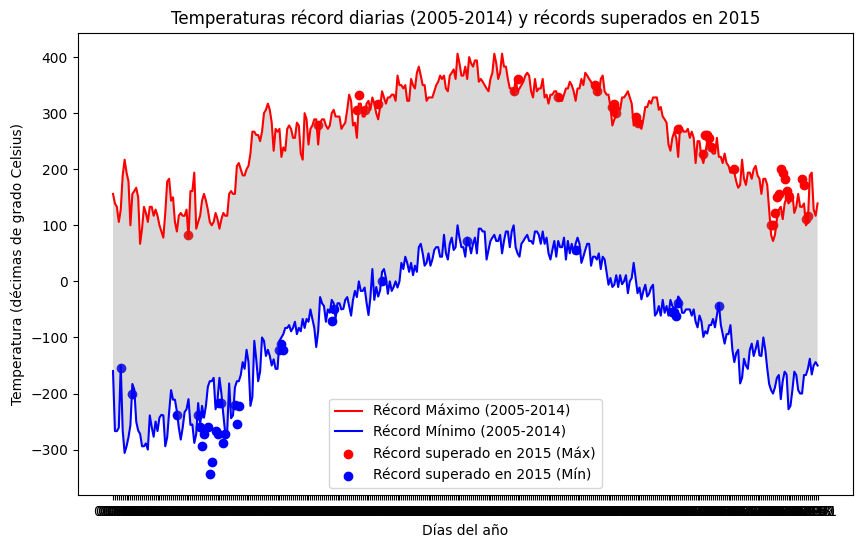

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


# Carga de datos desde el archivo CSV
file_path = '../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Eliminar los días bisiestos (29 de febrero)
data = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]

# Separar los datos de 2005-2014 y 2015
data_2005_2014 = data[data['Date'].dt.year != 2015]
data_2015 = data[data['Date'].dt.year == 2015]

# Encontrar las temperaturas máximas y mínimas récord por día del año (2005-2014)
record_high = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].max()
record_low = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby(data_2005_2014['Date'].dt.strftime('%m-%d'))['Data_Value'].min()

# Crear un gráfico lineal de temperaturas máximas y mínimas récord
plt.figure(figsize=(10, 6))
plt.plot(record_high, label='Récord Máximo (2005-2014)', color='red')
plt.plot(record_low, label='Récord Mínimo (2005-2014)', color='blue')

# Superponer los puntos de 2015 que superan los récords de 2005-2014
record_high_2015 = data_2015[data_2015['Element'] == 'TMAX'].groupby(data_2015['Date'].dt.strftime('%m-%d'))['Data_Value'].max()
record_low_2015 = data_2015[data_2015['Element'] == 'TMIN'].groupby(data_2015['Date'].dt.strftime('%m-%d'))['Data_Value'].min()

record_high_exceedances = record_high_2015[record_high_2015 > record_high]
record_low_exceedances = record_low_2015[record_low_2015 < record_low]

plt.scatter(record_high_exceedances.index, record_high_exceedances, color='red', label='Récord superado en 2015 (Máx)')
plt.scatter(record_low_exceedances.index, record_low_exceedances, color='blue', label='Récord superado en 2015 (Mín)')

# Añadir sombreado entre las temperaturas máximas y mínimas récord
plt.fill_between(record_high.index, record_high, record_low, facecolor='grey', alpha=0.3)

# Etiquetas y leyendas
plt.xlabel('Días del año')
plt.ylabel('Temperatura (décimas de grado Celsius)')
plt.title('Temperaturas récord diarias (2005-2014) y récords superados en 2015')
plt.legend()
plt.show()
